In [1]:
#DecisionTree Classifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [4]:
#1.Collecting the data

In [5]:
data=pd.read_csv("Datasets/pacific.csv")
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [6]:
#2.DataWrangling

In [7]:
pred_columns=data[:]
#pred_columns
pred_columns.drop(['ID','Name','Date','Time','Event','Status','Latitude','Longitude'],inplace=True,axis=1)
pred_columns

C:\Users\azart\AppData\Local\Temp\ipykernel_16432\1104191765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_columns.drop(['ID','Name','Date','Time','Event','Status','Latitude','Longitude'],inplace=True,axis=1)


,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,35,1002,60,0,0,0,0,0,0,0,0,0,0,0
26133,30,1007,0,0,0,0,0,0,0,0,0,0,0,0
26134,30,1008,0,0,0,0,0,0,0,0,0,0,0,0
26135,25,1009,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#list of input columns
input_columns=list(pred_columns)
input_columns

['Maximum Wind',
 'Minimum Pressure',
 'Low Wind NE',
 'Low Wind SE',
 'Low Wind SW',
 'Low Wind NW',
 'Moderate Wind NE',
 'Moderate Wind SE',
 'Moderate Wind SW',
 'Moderate Wind NW',
 'High Wind NE',
 'High Wind SE',
 'High Wind SW',
 'High Wind NW']

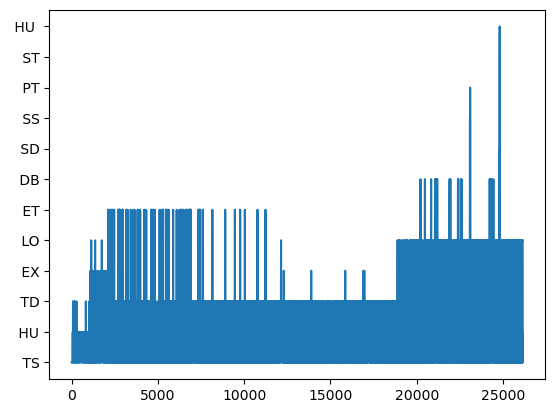

In [9]:
#import seaborn as sns
#sns.countplot(data['Status'],label='count')
plt.plot(data['Status'],label='count')
#plt.bar(data['Status'],label='count')
plt.show()

In [11]:
#sns.countplot(data['Status'],label='count')
#plt.show()

In [ ]:
#Splitting the data into training and testing

In [12]:
train,test=train_test_split(data,test_size=0.3)

In [15]:
#train
#test

In [21]:
#Relevant columns for training
train_X=train[input_columns]
train_Y=train['Status']

In [27]:
#Relevant columns for testing
test_X=test[input_columns]
test_Y=test['Status']

In [28]:
#model
model=tree.DecisionTreeClassifier()

In [29]:
#Training the Model
model.fit(train_X,train_Y)
predicition=model.predict(test_X)

In [30]:
#Accuracy measurement for the Model
metrics.accuracy_score(test_Y,predicition)

0.9572813057893395

In [32]:
d=pd.DataFrame({'PredicatedValue':predicition,'KownO/P':test_Y})
d.head(50)

,PredicatedValue,KownO/P
19542,HU,HU
21589,LO,TD
8241,TS,TS
24036,LO,LO
14693,TD,TD
13256,TS,TS
11675,TS,TS
18084,TS,TS
3874,TS,TS
23934,LO,LO
